In [4]:
import tensorflow as tf
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import keras

In [6]:
from vis.utils import utils
from keras import activations

In [8]:
model = tf.keras.applications.inception_v3.InceptionV3(
        input_shape=(224,224,3), include_top=True, weights='GoogleNet.h5', 
        input_tensor=None, pooling=None, classes=4)

In [9]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations

from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
from keras.preprocessing import image
import numpy as np

img_path = '/home/siddhant/Datasets/Minor/images/cropped/test/A/00087IMG_00087_BURST20190913103037.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 224, 224, 3)


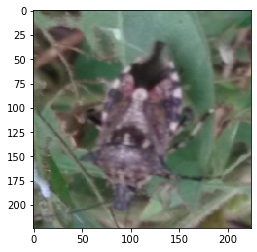

In [12]:
plt.imshow(img_tensor[0])
plt.show()

In [13]:
layer_outputs = [layer.output for layer in model.layers[:8]][1:]
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

In [14]:
activations = activation_model.predict(img_tensor)

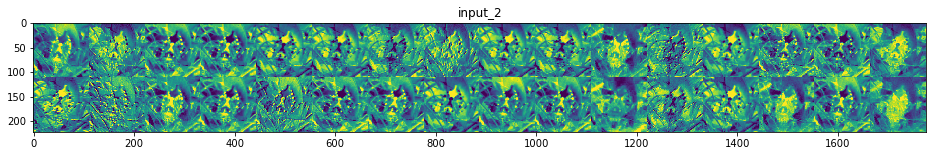

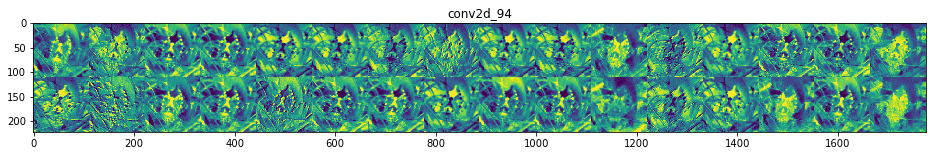

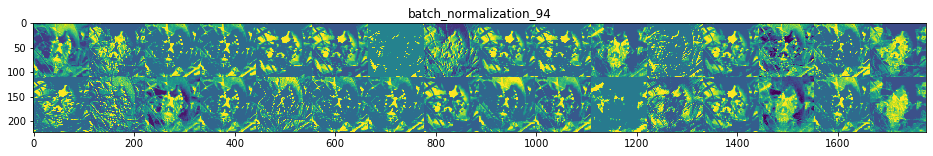

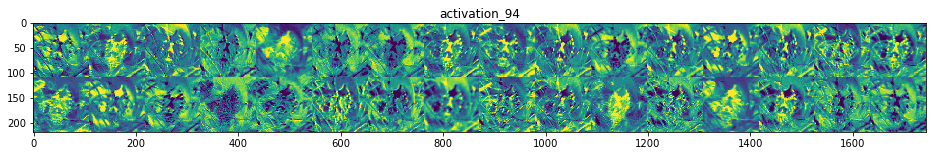

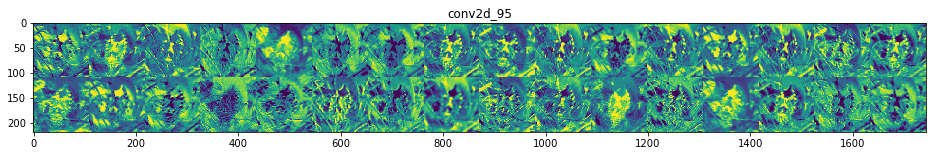

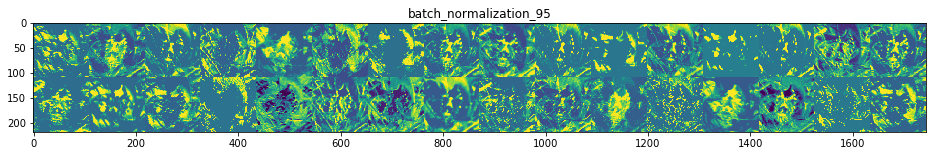

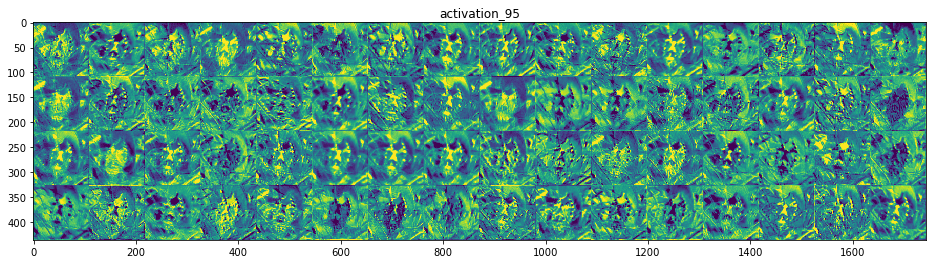

In [15]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
  
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
  
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
      
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
        scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [117]:
print(tf.__version__)

1.14.0
